In [1]:
from pycocotools.coco import COCO
import numpy as np
import cv2
import os

In [2]:
# Paths
coco_json_path = "../../data/sample-COCO.json"
images_dir = "../../data/"
output_masks_dir = "../../data/masks/"

In [3]:
# Load COCO annotations
coco = COCO(coco_json_path)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
# Create output directory for masks
os.makedirs(output_masks_dir, exist_ok=True)

In [5]:
# Iterate through all images in the dataset
for image_info in coco.dataset["images"]:
    image_id = image_info["id"]
    image_filename = image_info["file_name"]
    image_height = image_info["height"]
    image_width = image_info["width"]

    # Create a blank mask (initially all zeros)
    mask = np.zeros((image_height, image_width), dtype=np.uint8)

    # Get all annotations for this image
    annotation_ids = coco.getAnnIds(imgIds=[image_id])
    annotations = coco.loadAnns(annotation_ids)

    for annotation in annotations:
        # Get category ID (used as pixel value in mask)
        category_id = annotation["category_id"]
        
        # Get segmentation polygons
        segmentation = annotation["segmentation"]

        # Draw each polygon on the mask
        for polygon in segmentation:
            # Convert polygon points to numpy array
            points = np.array(polygon).reshape(-1, 2).astype(np.int32)
            # Draw the polygon
            cv2.fillPoly(mask, [points], color=category_id)

    # Save the mask
    mask_filename = os.path.splitext(image_filename)[0] + "_mask.png"
    mask_path = os.path.join(output_masks_dir, mask_filename)
    cv2.imwrite(mask_path, mask)

print(f"Masks generated and saved in {output_masks_dir}")

Masks generated and saved in ../../data/masks/


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


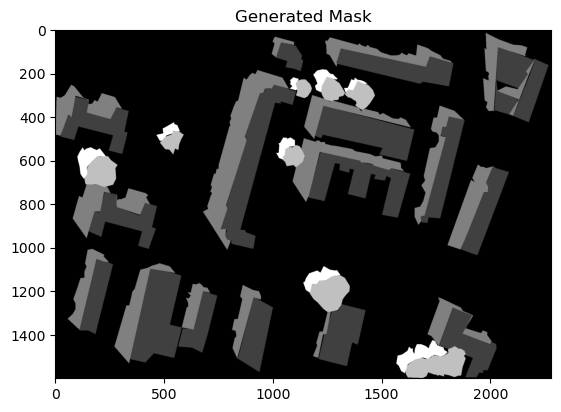

In [14]:
import matplotlib.pyplot as plt

# Load a generated mask
mask = cv2.imread("../../data/masks/00010_mask.png", cv2.IMREAD_GRAYSCALE)

# Visualize
plt.imshow(mask, cmap='gray')
plt.title("Generated Mask")
plt.show()